IMPORTING THE DEPENDENCIES

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

DATA COLLECTION AND PREPROCESSING

In [45]:
titanic_dataset = pd.read_csv("titanic.csv")

In [46]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
titanic_dataset.shape

(891, 12)

In [48]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

HANDLING THE MISSING VALUES

In [50]:
#Dropping the Cabin column from dataset.
titanic_dataset = titanic_dataset.drop(columns="Cabin" , axis=1)

In [51]:
#Replacing the age column with mean value
#Inplace true is not necessary it seems because now by default it changes in place if it is mean.
titanic_dataset["Age"].fillna(titanic_dataset["Age"].mean() , inplace=True)

C:\Users\admln\AppData\Local\Temp\ipykernel_17160\649664882.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_dataset["Age"].fillna(titanic_dataset["Age"].mean() , inplace=True)


In [52]:
#Replacing Embarked null with mode value
print(titanic_dataset["Embarked"].mode()[0])

S


In [53]:
titanic_dataset["Embarked"].fillna(titanic_dataset["Embarked"].mode()[0] , inplace=True)

C:\Users\admln\AppData\Local\Temp\ipykernel_17160\1463744763.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_dataset["Embarked"].fillna(titanic_dataset["Embarked"].mode()[0] , inplace=True)


In [54]:
#To check the missing values now.
titanic_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

DATA ANALYSIS

In [55]:
#Getting some statistical measures about the data
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [56]:
titanic_dataset["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

DATA VISUALIZATION

<Axes: xlabel='Survived', ylabel='count'>

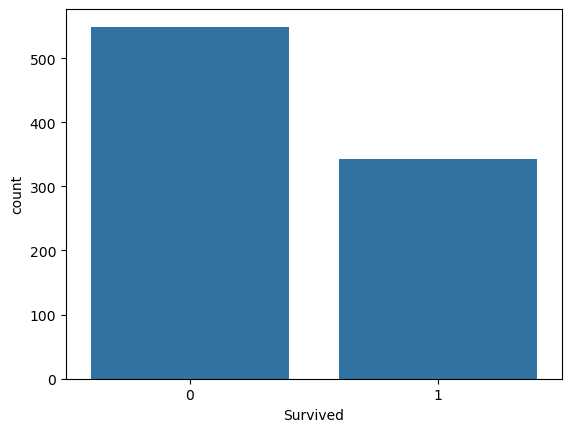

In [57]:
sns.countplot(x = "Survived" , data=titanic_dataset)

<Axes: xlabel='Sex', ylabel='count'>

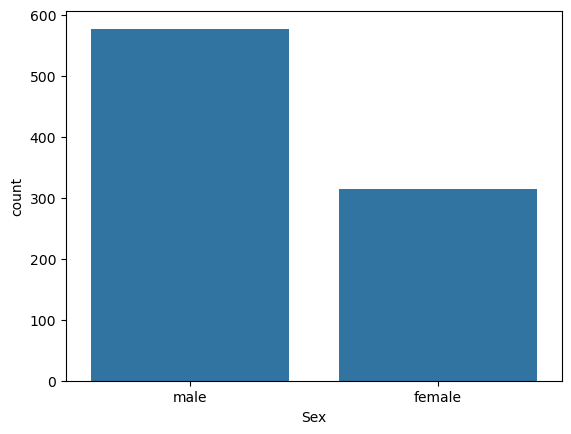

In [58]:
sns.countplot(x = "Sex" , data=titanic_dataset)

<Axes: xlabel='Sex', ylabel='count'>

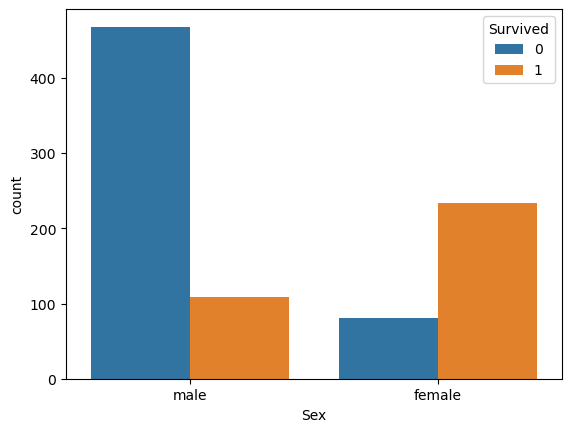

In [59]:
#Number of survivors genderwise
sns.countplot(x = "Sex" , hue="Survived" , data=titanic_dataset)

ENCODING THE CATEGORICAL COLUMN

In [60]:
titanic_dataset["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [61]:
titanic_dataset["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [62]:
#Converting the values
titanic_dataset.replace({'Sex' : {'male' : 0 , 'female' : 1} ,'Embarked' : {'S' : 0 , 'C' : 1 , 'Q' : 2}} , inplace=True)

C:\Users\admln\AppData\Local\Temp\ipykernel_17160\3819490188.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_dataset.replace({'Sex' : {'male' : 0 , 'female' : 1} ,'Embarked' : {'S' : 0 , 'C' : 1 , 'Q' : 2}} , inplace=True)


In [63]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


SEPARATING FEATURES AND TARGET

In [64]:
X = titanic_dataset.drop(columns = ["PassengerId" , "Name" , "Ticket" , "Survived"] , axis = 1) 
Y = titanic_dataset["Survived"]

In [65]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [66]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


SPLITTING THE DATA INTO TRAINING DATA AND TEST DATA

In [67]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 , random_state=2)

In [68]:
print(X.shape , X_train.shape , X_test.shape)

(891, 7) (712, 7) (179, 7)


MODEL TRAINING

In [69]:
model = LogisticRegression()

In [70]:
print(X_train)

     Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
30        1    0  40.000000      0      0   27.7208         1
10        3    1   4.000000      1      1   16.7000         0
873       3    0  47.000000      0      0    9.0000         0
182       3    0   9.000000      4      2   31.3875         0
876       3    0  20.000000      0      0    9.8458         0
..      ...  ...        ...    ...    ...       ...       ...
534       3    1  30.000000      0      0    8.6625         0
584       3    0  29.699118      0      0    8.7125         1
493       1    0  71.000000      0      0   49.5042         1
527       1    0  29.699118      0      0  221.7792         0
168       1    0  29.699118      0      0   25.9250         0

[712 rows x 7 columns]


In [71]:
#Fit the Model
model.fit(X_train , Y_train)

c:\Users\admln\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()